<a href="https://colab.research.google.com/github/shubham-bhatt/Shala2020/blob/master/Assignment/Assignment_4_Shubham_Bhatt_DS_L4_22_Apr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLE and Hypothesis Testing

### Read the given csv file [```q4.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv) of samples. Assume that it is drawn from a exponential distribution. What is the difference of log likelihoods for $\lambda = 1$ and $\lambda = 2$ ? Which of the two is more strongly supported?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv'
data = pd.read_csv(url,header=None)

# PDF of exponential distribution is $\lambda e^{-\lambda x}$
Define a function to find pdf. You can use any module to get pre-defined functions also. And then find the likelihood and log-likelihood

In [3]:
def pdf_ex(lmd,x):
  return lmd * np.exp(-1*lmd*x)
likelihood1 = 1
likelihood2 = 1
for a in data[1].values:
  likelihood1 = likelihood1 * pdf_ex(x = a, lmd = 1)
  likelihood2 = likelihood2 * pdf_ex(x = a, lmd = 2)
log_likelihood1 = np.log(likelihood1)
log_likelihood2 = np.log(likelihood2)
print('log likelihood for lambda = 2 -log likelihood for lambda = 1 :', log_likelihood2 - log_likelihood1)

log likelihood for lambda = 2 -log likelihood for lambda = 1 : 20.366416970604874


i.e. $\lambda = 2$ more likely

#### Adding to that

---
Several types of kernel functions are commonly used: uniform, triangle, Epanechnikov, quartic (biweight), tricube, triweight, Gaussian, quadratic and cosine

---

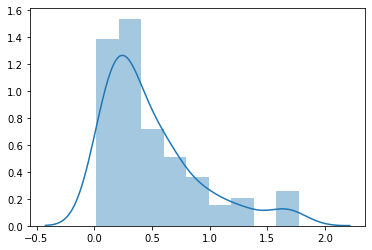

In [4]:
sns.distplot(data[1].values, kde=True, rug=False)       # kernel='gau' gaussian used by default, 
plt.show()

In [5]:
data[1].max()

1.7740164973784172

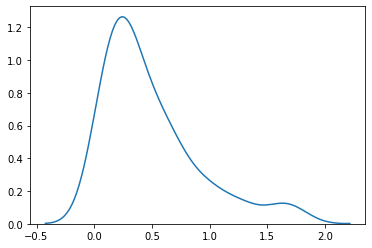

In [6]:
sns.kdeplot(data[1].values)
plt.show()

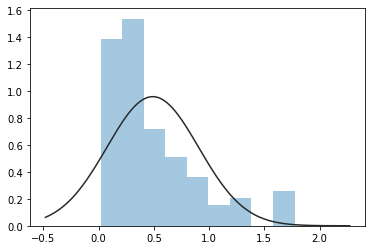

In [7]:
 # # Plot the distribution with a histogram and maximum likelihood gaussian distribution fit:
from scipy.stats import norm
sns.distplot(data[1].values, fit=norm, kde=False, rug=False) 
plt.show()

Q. how you can interpret which one is correct value of $ \lambda $ ?

Ans:- for which likelihood more

### Read the csv files [```q4_1.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv) and [```q4_2.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv) to get samples from two unknown distributions. Choose a significance level and implement the the most general two-sample t-test

In [0]:
sample1 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv',header=None)
sample2 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv',header=None)

In [9]:
print(sample1[1])  #, sample2[1], sep='\n')

0    -0.179278
1     0.236714
2     0.255502
3    -0.029321
4     0.004818
        ...   
95    0.017221
96    0.548891
97    0.171593
98    0.299186
99    0.177585
Name: 1, Length: 100, dtype: float64


Find the parameters required to compute the T statistic

$s_1^2 = S1 = var , s_2^2 = S2$ <br/>
$ S = \sqrt { \frac{s_1^2}{n1}+\frac{s_2^2}{n2}} $

t = (X1 -X2)/S

$ df = \frac{(\frac{S1}{n1} + \frac{S2} {n2})^2} {\frac{(S1/n1)^2}{n1-1}+ \frac{(S2/n2)^2}{n2-1}} $

In [0]:
significance = 0.5        # this basically tells how much error is accepted, this value go to calculate critical_value then comapre 
X1 = sample1[1].mean()            # or #   X11 = np.mean(sample1[1].values)
n1 = len(sample1.index)            # or #  sample1[1].count()
X2 = sample2[1].mean()            # or #    sample1[1].shape[0]
n2 = len(sample2.index)            # or #   np.var(sample1[1].values)
S1 = sample2[1].var()
S2 = sample2[1].var()
S = np.sqrt((S1/n1)+(S2/n2))
T = (X1 -X2)/S


Find the degrees of freedom $(df)$ to get the critical value

Critical value can find by $t_{(1- \alpha )/ 2, df}$

t.pdf => The probability density function for t

In [0]:
df = (np.square((S1/n1) + (S2/n2)))/((np.square(S1/n1)/(n1 - 1)) + (np.square(S2/n2)/(n2 - 1)))
critical_value = stats.t.pdf((1 - significance)/2, df)

Compare the critical value and the T statistic and conclude whether null hypothesis is accepted or not. Print 'YES' if it is rejected, otherwise print 'NO'.


In [13]:
# When absolute value of T > critical one then we reject null hypothesis
if critical_value < np.abs(T):
  print('Null hypothesis is rejected')
else:
  print('Null hypothesis is not rejected')


Null hypothesis is rejected


Plot the distribution of both the samples to visualize

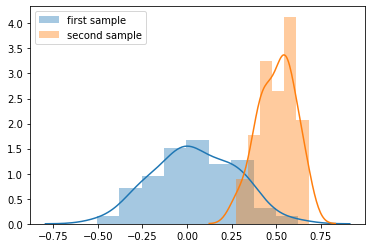

In [14]:
sns.distplot(sample1[1].values)

sns.distplot(sample2[1].values)
plt.legend(['first sample','second sample'])
plt.show()